In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import train & test data

In [ ]:
b_train = pd.read_csv('data/b_train.csv')
print('b_train: OK: {}'.format(b_train.shape))
#b_train.head()
#b_train.describe()

In [ ]:
b_test = pd.read_csv('data/b_test.csv')
print('b_test: OK: {}'.format(b_test.shape))
#b_test.head()
#b_test.describe()

## Prepare & split data for visualisation

In [ ]:
#b_train = b_train.dropna()
#b_test = b_test.dropna()

# Features in order of importance:'total_bids','bids_per_auction','mean_time_diff', 'total_auctions', 'ip_entropy', 'url_entropy', 'min_response', 'mean_response'

all_features = ['total_bids','total_auctions','bids_per_auction',
                'mean_time_diff', 'mean_response', 'min_response',
                'ip_entropy', 'url_entropy']

features = ['total_bids', 'total_auctions', 'bids_per_auction', 'mean_time_diff', 'ip_entropy', 'url_entropy']
target = ['outcome']

X = np.array(b_train[features])
y = np.array(b_train[target]).ravel()
print('X.shape = {}\ny.shape = {}'.format(X.shape, y.shape))

X_submission = np.array(b_test[features])
print('X_submission.shape = {}'.format(X_submission.shape))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_test_transformed = np.hstack((1 - y_test.reshape(y_test.size,1),
                                y_test.reshape(y_test.size,1)))

---
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param = {
         'bootstrap': True,
         'class_weight': 'balanced'
        }

In [ ]:
'''
auc_list = []
for i in range(1,10):
    RF_classifier = RandomForestClassifier(max_depth=i, random_state=0)
    RF_classifier.fit(X_train, y_train)
    auc_list.append(roc_auc_score(y_test_transformed, RF_classifier.predict_proba(X_test), average='weighted'))
best_max_depth = np.array(auc_list).argmax() + 1
print('best max_depth = {}'.format(best_max_depth)) # 2
print('roc-auc for it = {}'.format(np.array(auc_list).max()))
'''

### Cross validation (just testing)

In [ ]:
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
#for train_indices, test_indices in CV_SSS.split(X, y):
    #print(train_indices, test_indices)
    
RF_classifier = RandomForestClassifier(max_depth=3, random_state=None)
RF_cross_val_scoring = cross_val_score(RF_classifier, X, y, scoring='roc_auc', cv=CV_SSS)
print(RF_cross_val_scoring)
print('mean: {:.4f}, max: {:.4f}, min: {:.4f}, std: {:.4f}'.format(RF_cross_val_scoring.mean(),
                                                               RF_cross_val_scoring.max(), 
                                                               RF_cross_val_scoring.min(),
                                                               RF_cross_val_scoring.std()))

### Hyperparameters

Choose the parameter max_depth

In [ ]:
global_depth = []
for j in range(20):
    CV_SSS = StratifiedShuffleSplit(n_splits = 6, test_size = 0.33, random_state=None)
    auc_list = []
    for i in range(2,8):
        RF_classifier = RandomForestClassifier(max_depth=i, random_state=None)
        RF_cross_val_scoring = cross_val_score(RF_classifier, X, y, scoring='roc_auc', cv=CV_SSS)
        auc_list.append(RF_cross_val_scoring.mean())
    best_max_depth = np.array(auc_list).argmax() + 1
    #print('best max_depth = {}'.format(best_max_depth)) # 2
    #print('roc-auc for it = {}'.format(np.array(auc_list).max()))
    global_depth.append(best_max_depth)
global_depth, pd.DataFrame(global_depth).hist()

In [ ]:
best_max_depth = pd.DataFrame(global_depth).mode()[0][0]
best_max_depth

In [ ]:
'''
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=42)
#for i in range(1,100):
RF_classifier = RandomForestClassifier(max_depth=best_max_depth, random_state=0)
RF_cross_val_scoring = cross_val_score(RF_classifier, X, y, scoring='roc_auc', cv=CV_SSS)
print(RF_cross_val_scoring)
print('mean: {:.4f}, max: {:.4f}, min: {:.4f}, std: {:.4f}'.format(RF_cross_val_scoring.mean(),
                                                               RF_cross_val_scoring.max(), 
                                                               RF_cross_val_scoring.min(),
                                                               RF_cross_val_scoring.std()))

global_aucs = []
for j in range(20):
    CV_SSS = StratifiedShuffleSplit(n_splits = 6, test_size = 0.33, random_state=None)
    auc_list = []
    for i in range(20):
        RF_classifier = RandomForestClassifier(max_depth=best_max_depth, random_state=i)
        RF_cross_val_scoring = cross_val_score(RF_classifier, X, y, scoring='roc_auc', cv=CV_SSS)
        auc_list.append(RF_cross_val_scoring.mean())
    #best_max_depth = np.array(auc_list).argmax() + 1
    global_aucs.append(auc_list)
#global_depth, pd.DataFrame(global_depth).hist()

best_random_state = np.array(global_aucs).mean(axis=0).argmax()
best_random_state
random_states = np.unravel_index(rs, np.array(global_aucs).shape)
'''

### Cross validation

In [ ]:
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
#for train_indices, test_indices in CV_SSS.split(X, y):
    #print(train_indices, test_indices)
    
RF_classifier = RandomForestClassifier(max_depth=best_max_depth, random_state=None)
RF_cross_val_scoring = cross_val_score(RF_classifier, X, y, scoring='roc_auc', cv=CV_SSS)
print(RF_cross_val_scoring)
print('mean: {:.4f}, max: {:.4f}, min: {:.4f}, std: {:.4f}'.format(RF_cross_val_scoring.mean(),
                                                               RF_cross_val_scoring.max(), 
                                                               RF_cross_val_scoring.min(),
                                                               RF_cross_val_scoring.std()))

### ROC curve on test data (from train_test_split)

In [ ]:
RF_classifier.fit(X_train, y_train)

print(RF_classifier.feature_importances_)

#y_pred = RF_classifier.predict(X_test)
#acc_score = accuracy_score(y_test, y_pred)
#print('accuracy = {}'.format(acc_score))

y_score = RF_classifier.predict_proba(X_test)
auc_score = roc_auc_score(y_test_transformed, y_score, average='weighted')
print('roc-auc = {}'.format(auc_score))

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_transformed[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area for 1
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Predict on test data (to submission) 

In [ ]:
RF_classifier.fit(X, y)
submission_prediction = RF_classifier.predict_proba(X_submission)[:,1]
print(submission_prediction)

In [ ]:
b_test['prediction'] = submission_prediction
b_test.head()

In [ ]:
b_test_RF = pd.read_csv('data/SubmissionRF2_3.csv')
b_test_RF.head()

In [ ]:
for bidder in b_test_RF.bidder_id:
    if (bidder in list(b_test.bidder_id)):
        #print(bidder)
        #print(np.array(b_test[b_test.bidder_id==bidder].prediction)[0])
        b_test_RF.loc[b_test_RF[b_test_RF.bidder_id == bidder].index,
                      'prediction'] = np.array(b_test[b_test.bidder_id==bidder].prediction)[0]

In [ ]:
b_test_RF.to_csv('data/SubmissionRF3_6.csv', sep=',', header=True, index=False)

---
# XGBoost

In [ ]:
import xgboost

xgb_param = {
             'max_depth': 20,
             'learning_rate': 1,
             'n_estimators': 100,
#             'silent': True,
#             'objective': 'binary:logistic',
             'reg_alpha': 1,
             'reg_lambda': 0
            }

### Hyperparameters: Grid Search

In [ ]:
XGB_Classifier = xgboost.XGBClassifier()
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)

xgb_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

In [608]:
# grid_XGB_CV = GridSearchCV(XGB_Classifier, xgb_param_grid, scoring = 'roc_auc', cv = CV_SSS)
# grid_XGB_CV.fit(X,y)
# print(grid_XGB_CV.best_score_)
# print(grid_XGB_CV.best_params_)

In [609]:
random_grid_XGB_CV = RandomizedSearchCV(XGB_Classifier, xgb_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40)
random_grid_XGB_CV.fit(X,y)
print(random_grid_XGB_CV.best_score_)
print(random_grid_XGB_CV.best_params_)

0.913656965649
{'reg_lambda': 1.6000000000000001, 'reg_alpha': 1.4000000000000001, 'n_estimators': 40, 'max_depth': 22, 'learning_rate': 0.20000000000000001}


### Cross validation

In [610]:
xgb_param = random_grid_XGB_CV.best_params_

In [611]:
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)

XGB_Classifier = xgboost.XGBClassifier(max_depth=xgb_param['max_depth'],
                                       learning_rate=xgb_param['learning_rate'],
                                       n_estimators=xgb_param['n_estimators'],
#                                       silent=xgb_param['silent'],
#                                       objective=xgb_param['objective'],
                                       reg_alpha=xgb_param['reg_alpha'],
                                       reg_lambda=xgb_param['reg_lambda'])

XGB_cross_val_scoring = cross_val_score(XGB_Classifier, X, y, scoring='roc_auc', cv=CV_SSS)
print(XGB_cross_val_scoring)
print('mean: {:.4f}, max: {:.4f}, min: {:.4f}, std: {:.4f}'.format(XGB_cross_val_scoring.mean(),
                                                               XGB_cross_val_scoring.max(), 
                                                               XGB_cross_val_scoring.min(),
                                                               XGB_cross_val_scoring.std()))

[ 0.89366651  0.93198354  0.88910425  0.90818822  0.94018368]
mean: 0.9126, max: 0.9402, min: 0.8891, std: 0.0203


### ROC curve on test data (from train_test_split)

In [612]:
XGB_Classifier = xgboost.XGBClassifier(max_depth=xgb_param['max_depth'],
                                       learning_rate=xgb_param['learning_rate'],
                                       n_estimators=xgb_param['n_estimators'],
                                       reg_alpha=xgb_param['reg_alpha'],
                                       reg_lambda=xgb_param['reg_lambda'])
XGB_Classifier.fit(X,y)

print(XGB_Classifier.feature_importances_)

#y_pred = RF_classifier.predict(X_test)
#acc_score = accuracy_score(y_test, y_pred)
#print('accuracy = {}'.format(acc_score))

y_score = XGB_Classifier.predict_proba(X_test)
auc_score = roc_auc_score(y_test_transformed, y_score, average='weighted')
print('roc-auc = {}'.format(auc_score))

[ 0.11466942  0.13739669  0.19318181  0.19318181  0.13739669  0.22417356]
roc-auc = 0.9856601731601732


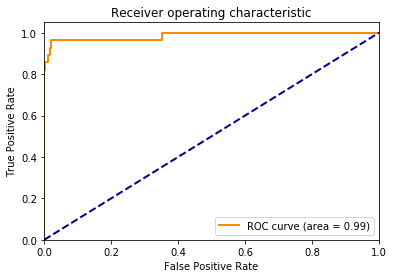

In [613]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_transformed[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area for 1
plt.figure()
lw = 2

plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Predict on test data (to submission) 

In [614]:
XGB_Classifier.fit(X, y)
submission_prediction = XGB_Classifier.predict_proba(X_submission)[:,1]
print(submission_prediction)

[ 0.00250417  0.00342473  0.00902654 ...,  0.11084274  0.00250417
  0.02718822]


In [616]:
b_test['prediction'] = submission_prediction
b_test.head()

,bidder_id,total_bids,total_auctions,bids_per_auction,mean_time_diff,mean_response,min_response,ip_entropy,url_entropy,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,4,3,1.3333,444750.0000,16.7500,0.0,1.7918,1.7918,0.002504
1,a921612b85a1494456e74c09393ccb65ylp4y,3,2,1.5000,722019.5000,371.3333,2.0,0.6931,0.0000,0.003425
2,6b601e72a4d264dab9ace9d7b229b47479v6i,17,14,1.2143,345.6250,186.3529,0.0,17.3592,8.8929,0.009027
3,eaf0ed0afc9689779417274b4791726cn5udi,148,90,1.6444,9890.5510,7762.0946,0.0,580.2510,384.8401,0.007464
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,23,20,1.1500,5678.2273,9168.6957,16.0,48.4712,0.0000,0.002413


In [617]:
b_test[['bidder_id','prediction']].to_csv('data/SubmissionXGBoostGrid_6.csv', sep=',', header=True, index=False)

### Another variant  (2)

In [ ]:
__author__ = 'Markiian'
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

param = {
         'max_depth': 20,
         'eta': 1,
         'silent': 1, 
         'objective': 'binary:logistic',
         'nthread': 4,
         'eval_metric': 'auc'
        }

evallist = [(test_data, 'eval'), (train_data, 'train')]

num_round = 10
bst = xgb.train(param, train_data, num_round, evallist)

draw ROC curve

In [ ]:
test_data = xgb.DMatrix(X_test)
y_score = bst.predict(test_data)
y_score = np.hstack((1 - y_score.reshape(y_score.size,1),
                     y_score.reshape(y_score.size,1)))

fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_transformed[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Predict on test data to submission

In [ ]:
b_test['prediction'] = submission_prediction #np.round(submission_prediction)
b_test.head()

In [ ]:
b_test[['bidder_id','prediction']].to_csv('data/SubmissionXGBoost_6.csv', sep=',', header=True, index=False)

# other

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.cluster import MiniBatchKMeans

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD_classifier = SGDClassifier(loss='modified_huber', penalty='l2',
                               alpha=0.001, max_iter=1000, tol=1e-3)
SGD_classifier.fit(X_train, y_train)

print('accuracy = {}'.format(SGD_classifier.score(X_test, y_test)))

y_score = SGD_classifier.predict_proba(X_test)
auc_score = roc_auc_score(y_test_transformed, y_score, average='weighted')
print('roc-auc = {}'.format(auc_score))

In [ ]:
# array = X_test.dot(SGD_classifier.coef_[0])
# y_score = (array - array.min()) / (array.max() - array.min())
# y_score = y_score.reshape((y_score.size,1))
# y_score = np.hstack((y_score, 1 - y_score))
# auc_score = roc_auc_score(y_test_transformed, y_score, average='weighted')
# print('roc-auc = {}'.format(auc_score))